In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium

In [3]:
##reading the files upto 5000 rows
df=pd.read_csv("US_Accidents_5000,nrows=5000)

In [4]:
#1st 5 elements of the data
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
#last 5 elements of data
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4995,A-4996,Source2,2,2016-08-01 11:35:41,2016-08-01 12:05:41,38.734211,-120.824852,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4996,A-4997,Source2,2,2016-08-01 11:41:23,2016-08-01 12:26:23,38.258327,-122.065071,NaN,NaN,0.0,...,False,False,False,False,True,False,Day,Day,Day,Day
4997,A-4998,Source2,2,2016-08-01 11:57:27,2016-08-01 12:42:27,38.510632,-122.985100,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4998,A-4999,Source2,2,2016-08-01 12:00:54,2016-08-01 12:30:54,38.618111,-121.410683,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4999,A-5000,Source2,2,2016-08-01 11:59:44,2016-08-01 12:29:44,38.657719,-121.363869,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   object 
 1   Source                 5000 non-null   object 
 2   Severity               5000 non-null   int64  
 3   Start_Time             5000 non-null   object 
 4   End_Time               5000 non-null   object 
 5   Start_Lat              5000 non-null   float64
 6   Start_Lng              5000 non-null   float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           5000 non-null   float64
 10  Description            5000 non-null   object 
 11  Street                 5000 non-null   object 
 12  City                   5000 non-null   object 
 13  County                 5000 non-null   object 
 14  State                  5000 non-null   object 
 15  Zipc

In [8]:
#Convert time & extract hour
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour

df[['Start_Time', 'Hour']].head()

,Start_Time,Hour
0,2016-02-08 05:46:00,5
1,2016-02-08 06:07:59,6
2,2016-02-08 06:49:27,6
3,2016-02-08 07:23:34,7
4,2016-02-08 07:39:07,7


In [9]:
#Clean missing values
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Hour'])
df.shape

(5000, 47)

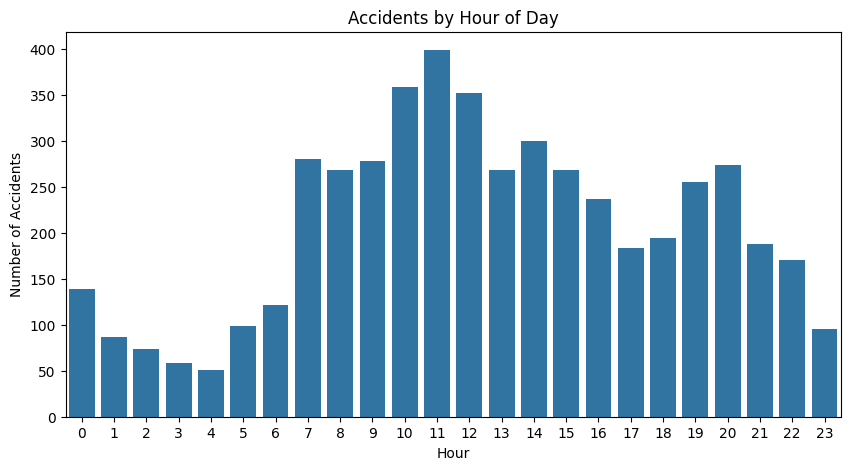

In [10]:
#TIME OF DAY ANALYSIS
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

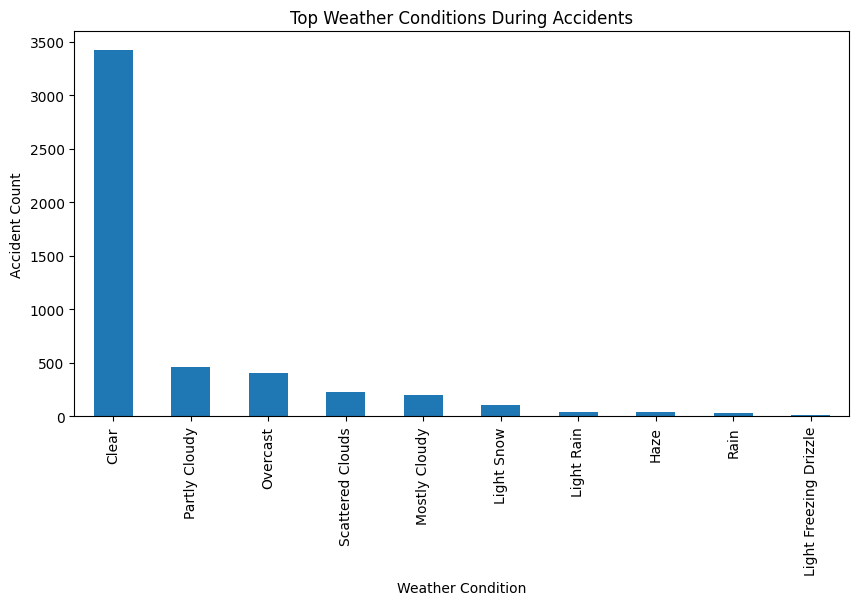

In [18]:
#WEATHER ANALYSIS
weather_counts = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10,5))
weather_counts.plot(kind='bar')
plt.title("Top Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.show()

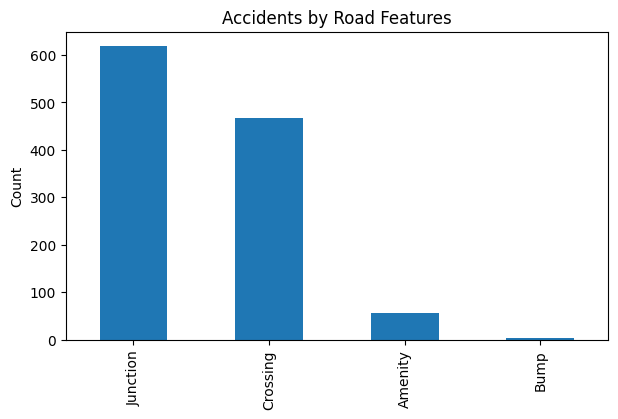

In [19]:
#ROAD CONDITIONS ANALYSIS
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction']
road_counts = df[road_features].sum().sort_values(ascending=False)
road_counts.plot(kind='bar', figsize=(7,4))
plt.title("Accidents by Road Features")
plt.ylabel("Count")
plt.show()

In [21]:
#ACCIDENT HOTSPOTS (MAP)
sample_df = df.sample(5000, random_state=1)

In [22]:
#the HEATMAP
m = folium.Map(
    location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()],
    zoom_start=5
)

HeatMap(
    sample_df[['Start_Lat', 'Start_Lng']].values,
    radius=8
).add_to(m)

m

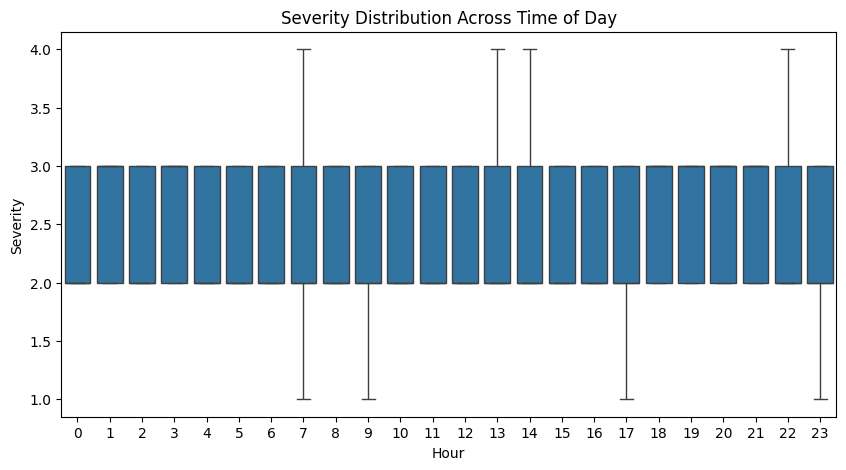

In [23]:
#combined data
plt.figure(figsize=(10,5))
sns.boxplot(x='Hour', y='Severity', data=df)
plt.title("Severity Distribution Across Time of Day")
plt.show()

In [26]:
#final analysis
print("""Analysis of the US-Accidents dataset reveals that accident frequency peaks during morning 
and evening rush hours. Adverse weather conditions, especially rain, significantly contribute to 
higher accident counts and severity. Road features such as junctions and crossings show higher accident 
involvement. Spatial heatmap analysis identifies urban and highway regions as major accident hotspots, 
indicating the need for targeted traffic safety measures.""")

Analysis of the US-Accidents dataset reveals that accident frequency peaks during morning 
and evening rush hours. Adverse weather conditions, especially rain, significantly contribute to 
higher accident counts and severity. Road features such as junctions and crossings show higher accident 
involvement. Spatial heatmap analysis identifies urban and highway regions as major accident hotspots, 
indicating the need for targeted traffic safety measures.
